# Authors: Wei Wu and Lina Hammargren (around 15 hours)


In [2]:
# Authors: Wei Wu and Lina Hammargren

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from operator import eq
from sklearn.preprocessing import StandardScaler

from collections import Counter

df=pd.read_csv("data_all.csv")
df.columns = df.columns.str.replace(' ','_')
#print("Description of series Psi: ")
#print(df['psi'].describe())
#print("")
#print("Description of series Phi: ")
#print(df['phi'].describe())
#print("")
#print("Data types for the different series: ")
#print(df.dtypes)
df.head()

,residue_name,position,chain,phi,psi
0,LYS,10,A,-149.312855,142.657714
1,PRO,11,A,-44.283210,136.002076
2,LYS,12,A,-119.972621,-168.705263
3,LEU,13,A,-135.317212,137.143523
4,LEU,14,A,-104.851467,95.928520


<big><b>Question 1 a: Show the distribution of phi and psi combinations using a scatter plot</b></big>

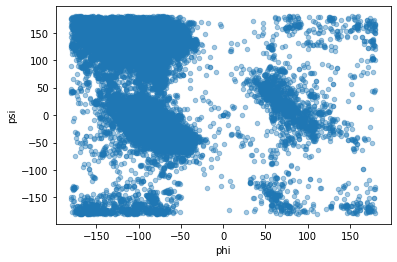

In [3]:
#we add an alpha blending value to make the plot more clear
df.plot.scatter(x="phi", y="psi", alpha = 0.4)

Looking at the scatter plot, we can see that there is a high density of points at some parts of the scatter plot (this is where the sections are more opaque).

<big><b>Question 1 b: Show the distribution of phi and psi combinations using a heatmap</b></big>

Text(0.5, 1.0, 'Heatmap')

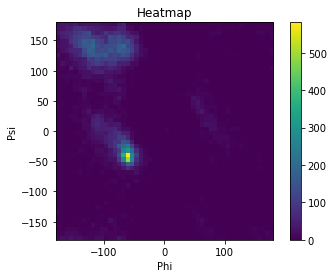

In [4]:
# Binning
heatmap1, xx, yy=np.histogram2d(df['phi'], df['psi'], bins=(50,50))
extent=[xx[0], xx[-1], yy[0],yy[-1]]

# Plotting the first heatmap (with bins 10 and 10 respectively for psi and phi)
plt.clf()
plt.imshow(heatmap1.T, extent=extent, origin='lower')
plt.colorbar()
plt.xlabel('Phi')
plt.ylabel('Psi')
plt.title('Heatmap')

Looking at the heatmap with 50 bins for phi and psi, we can distinguish two or maybe three clusters. 

<big><b>Question 2 a: Use the K-means clustering method to cluster the phi and psi angle combinations in the data file. Experiment with different values of K. Suggest an appropriate value of K for this task and motivate this choice.</b></big>

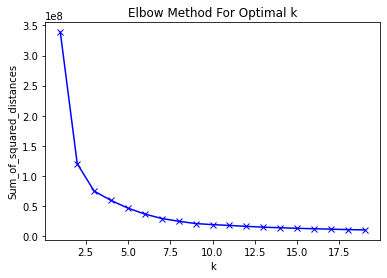

In [5]:
from pandas import DataFrame

data_h=df[["phi","psi"]]

Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_h)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In the plot above the elbow is at k=3 indicating the optimal k for this dataset is 3. Here we suggest 3 as our best k value.


<big><b>Question 2 b: Validate the clusters that are found with the chosen value of K.</b></big>

We begin by looking at the results and the silhouette score for the full data set.

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=2)
kmeans.fit(data_h)
y_kmeans = kmeans.predict(data_h)


kmeans3 = KMeans(n_clusters=3)
kmeans3.fit(data_h)
y_kmeans3 = kmeans3.predict(data_h)

kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(data_h)
y_kmeans4 = kmeans4.predict(data_h)

kmeans5 = KMeans(n_clusters=5)
kmeans5.fit(data_h)
y_kmeans5 = kmeans5.predict(data_h)

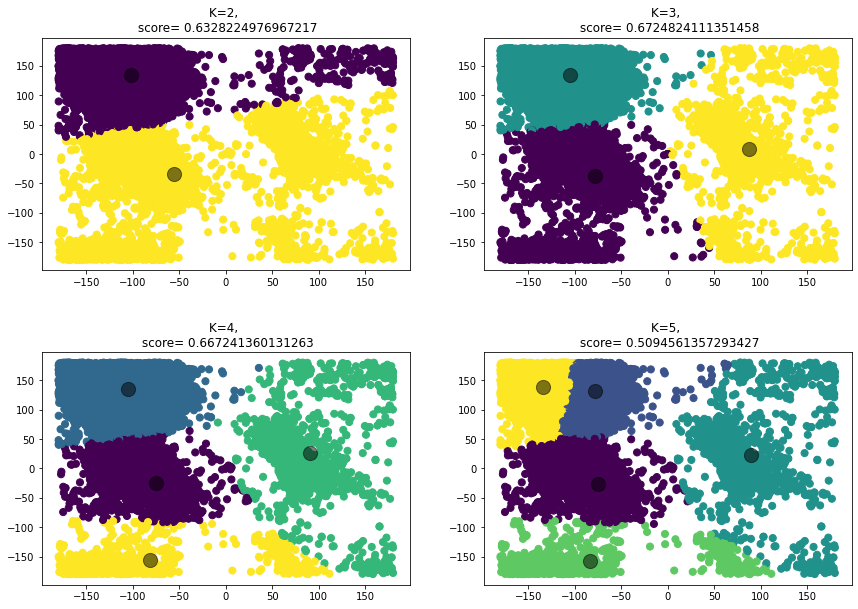

In [9]:
plt.subplot(222)
plt.scatter(data_h["phi"], data_h["psi"], c=y_kmeans3, s=50)
centers = kmeans3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.title(f"K=3, \n score= {silhouette_score(data_h, kmeans3.labels_)}")


plt.subplot(221)
plt.scatter(data_h["phi"], data_h["psi"], c=y_kmeans, s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.title(f"K=2, \n score= {silhouette_score(data_h, kmeans.labels_)}")


plt.subplot(223)
plt.scatter(data_h["phi"], data_h["psi"], c=y_kmeans4, s=50)
centers = kmeans4.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.title(f"K=4, \n score= {silhouette_score(data_h, kmeans4.labels_)}")


plt.subplot(224)
plt.scatter(data_h["phi"], data_h["psi"], c=y_kmeans5, s=50)
centers = kmeans5.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.title(f"K=5, \n score= {silhouette_score(data_h, kmeans5.labels_)}")


plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=2, 
                    top=2, 
                    wspace=0.2, 
                    hspace=0.35)

plt.show()

The silhouette score for k=2 is 0.6328224976967217.
The silhouette score for k=3 is 0.6724363812332059.
The silhouette score for k=4 is 0.6674437338553395.
The silhouette score for k=5 is 0.5094683357759784.

From the above plots we can see that the best k value (k=3) when looking at the silhouette score is the same as the one in 2a (k=3).
Now, we look at what happens if we only use 75% of the data set. Will the clusters be the same?

In [10]:
sample_75=data_h.sample(frac=0.75, replace=False)

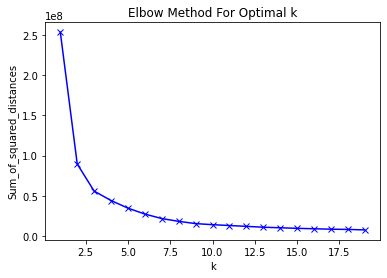

In [11]:
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(sample_75)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

K is still 3 here. So we look at the results of the clustering.

In [12]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(sample_75)
y_kmeans = kmeans.predict(sample_75)

Text(0, 0.5, 'Psi')

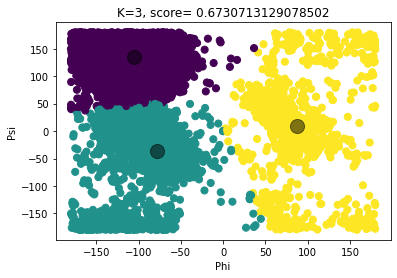

In [13]:
plt.scatter(sample_75["phi"], sample_75["psi"], c=y_kmeans, s=50, cmap='viridis')

centers_75 = kmeans.cluster_centers_
plt.scatter(centers_75[:, 0], centers_75[:, 1], c='black', s=200, alpha=0.5);

scores=silhouette_score(sample_75, kmeans.labels_)
plt.title(f"K=3, score= {scores}")
plt.xlabel('Phi')
plt.ylabel('Psi')

In [14]:
# Are the cluster centers the same?

# Cluster centers when using the full data set
print("Cluster centers for k=3 and full dataset:")
print(kmeans3.cluster_centers_)
print("Cluster centers for k=3 and 75% of dataset:")
print(centers_75)

Cluster centers for k=3 and full dataset:
[[ -78.09548691  -36.87983463]
 [-105.18699673  134.63849967]
 [  87.55008471    8.80213455]]
Cluster centers for k=3 and 75% of dataset:
[[-105.08926043  134.45903859]
 [ -78.03341899  -37.07808767]
 [  87.3132537     9.08563248]]


<b>Comment: </b>The result shows that the cluster centers are similar in the full dataset and the dataset containing 75% of the data points.

<big><b>Question 2 c: Do the clusters found in part (a) seem reasonable?</b></big>

<b>Comment:</b>
Yes, when we choose k is 3, the cluster validation plot matches both the heatmap and scatterplot (see in 1a) well and when k is 3, its silhouette score is best.

<big><b>Question 2 d: Can you change the data to get better results (or the same results in a simpler way?)?</b></big>



We decided to shift the values by periods,and replace the missing value to 0.Here we assume the value of the periods is 2000.

And we also try to take modulo 360 to transform the data from -180 to 180 degrees into 0 to 360 degrees.

In [15]:
df_shift=data_h.shift(periods=2000, fill_value=0)
#print(df_shift)

Text(0, 0.5, 'Psi')

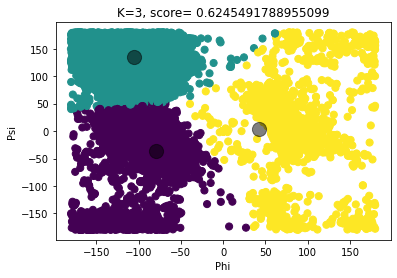

In [16]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_shift)
y_kmeans = kmeans.predict(df_shift)


plt.scatter(df_shift["phi"], df_shift["psi"], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

scores=silhouette_score(df_shift, kmeans.labels_)
plt.title(f"K=3, score= {scores}")
plt.xlabel('Phi')
plt.ylabel('Psi')

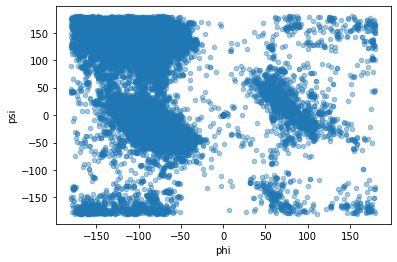

In [17]:
df_shift.plot.scatter(x='phi', y='psi', alpha = 0.4)

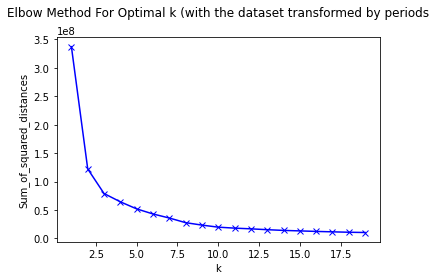

In [24]:
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_shift)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k (with the dataset transformed by periods\n')
plt.tight_layout()

plt.show()

<b>Comment: </b>They have similar results as the result of the original dataset, the same best K value. However, the score is slightly lower than the original dataset.This case the score is ~0.625 and the original score is ~0.672. This transformed data generates a model with not good defined clusters. 
 
 Next, we try another shift way.

In [25]:
newdf_shift=pd.DataFrame((df_shift[['phi', 'psi']].values) % 360)

Text(0, 0.5, 'Psi')

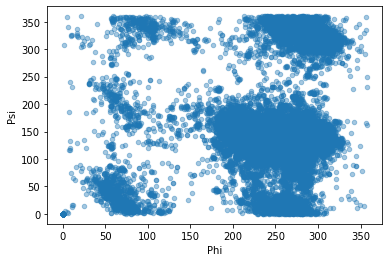

In [26]:
newdf_shift.plot.scatter(x=0, y=1, alpha = 0.4)
plt.xlabel('Phi')
plt.ylabel('Psi')

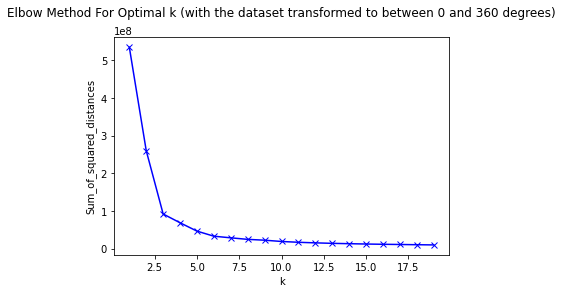

In [28]:
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(newdf_shift)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k (with the dataset transformed to between 0 and 360 degrees)\n')
plt.show()

In [29]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(newdf_shift)
y_kmeans = kmeans.predict(newdf_shift)

Text(0, 0.5, 'Psi')

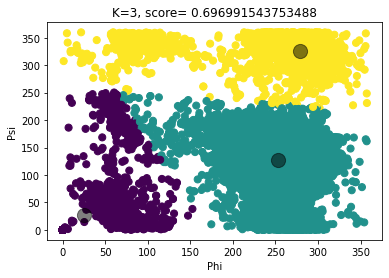

In [30]:
plt.scatter(newdf_shift[0], newdf_shift[1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

scores=silhouette_score(newdf_shift, kmeans.labels_)
plt.title(f"K=3, score= {scores}")
plt.xlabel('Phi')
plt.ylabel('Psi')

In [31]:
print("Cluster centers for k=3 and full dataset (%360 for comparison):")
print(kmeans3.cluster_centers_ % 360)

print("Cluster centers for k=3 and transformed dataset:")
print(kmeans.cluster_centers_)

Cluster centers for k=3 and full dataset (%360 for comparison):
[[281.90451309 323.12016537]
 [254.81300327 134.63849967]
 [ 87.55008471   8.80213455]]
Cluster centers for k=3 and transformed dataset:
[[ 25.25592848  27.4250017 ]
 [252.78150145 127.59153035]
 [278.55921552 324.9879719 ]]


<b>Comment:</b> When we do this data transformation, we get a higher silhouette score (~0.697 for the transformed data as compared to ~0.672 for the original data set). While two of the cluster centers are quite similar there is one which is not similar which is 87.48,8.73 for the non-transformed dataset and 25.18,27.30 for the transformed dataset. We therefore get different results with the transformed data but the result is better when comparing the silhouette coefficient, which means that the transformed data generates a model with better defined clusters. 

<big><b>Question 3 a: Use the DBSCAN method to cluster the phi and psi angle combinations in the data file</b></big><br>
Motivate:<br>
i. the choice of the minimum number of samples in the neighbourhood for a point to be considered as a core point <br>
ii. the choice of the maximum distance between two samples belonging to the same neighbourhood (epsilon)

In [32]:
# Standardize the data
standard_df=StandardScaler().fit_transform(df[['phi','psi']])

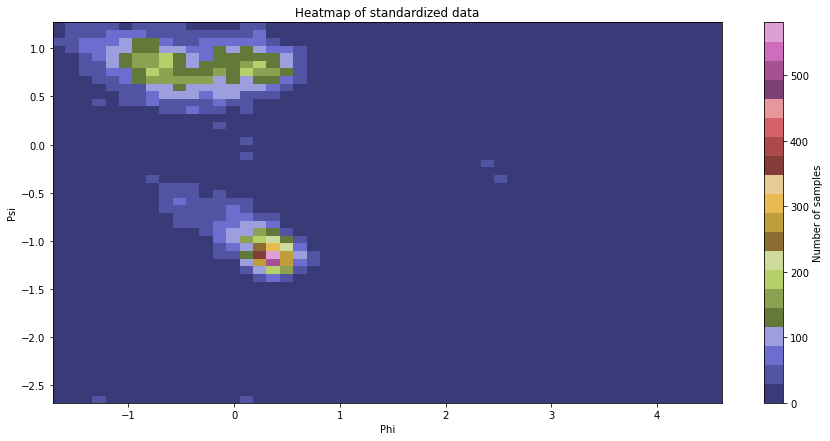

In [33]:
# i. Motivate the choice of the minimum number of samples in the neighbourhood for a point to be considered a core point

plt.figure(figsize=(15, 7))
# Plot 2D histogram from X
# We can choose different colormaps (i.e., viridis, plasma, inferno, magma, cividis).
plt.hist2d(standard_df[:,0], standard_df[:,1], bins=50, cmap='tab20b')

# Plot a colorbar with label.
cb = plt.colorbar()
cb.set_label('Number of samples')

# Add title and labels to plot.

plt.title('Heatmap of standardized data')
plt.xlabel('Phi')
plt.ylabel('Psi')

# Show the plot.
plt.show()

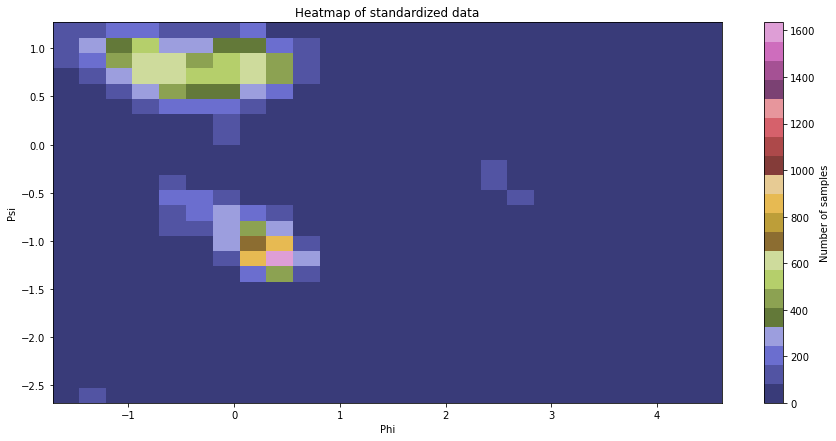

In [34]:
# i. Motivate the choice of the minimum number of samples in the neighbourhood for a point to be considered a core point

plt.figure(figsize=(15, 7))
# Plot 2D histogram from X
# We can choose different colormaps (i.e., viridis, plasma, inferno, magma, cividis).
plt.hist2d(standard_df[:,0], standard_df[:,1], bins=25, cmap='tab20b')

# Plot a colorbar with label.
cb = plt.colorbar()
cb.set_label('Number of samples')

# Add title and labels to plot.

plt.title('Heatmap of standardized data')
plt.xlabel('Phi')
plt.ylabel('Psi')

# Show the plot.
plt.show()

<b>Comments</b> on how we define the min_samples:

Looking at the heatmap, the lighter blue pixels contain over 200 samples. The green and yellow pixels contain over 300 samples. So we can see here that there are two clusters that are more dense. However, there are two clusters that contain over 100 samples that are distinct from the rest of the pixels. We therefore chose min_samples=100.

Text(0, 0.5, 'Distances')

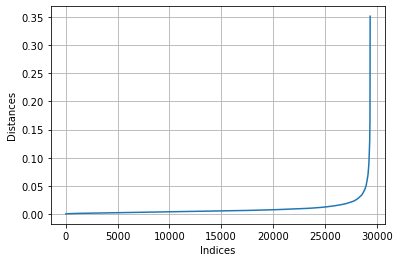

In [35]:
# ii: Motivate the choice of maximum distance between two samples belonging to the same neighbourhood
# We want to calculate the distance from each point to its closest neighbour. 
from sklearn.neighbors import NearestNeighbors

neighbours=NearestNeighbors(n_neighbors=2).fit(standard_df)
distances, indices = neighbours.kneighbors(standard_df)
distances=np.sort(distances, axis=0)
distances=distances[:,1]
plt.plot(distances)
plt.grid()
plt.xlabel('Indices')
plt.ylabel('Distances')


To see the turning point in more detail, we plot the distance between 27000 to 30000.

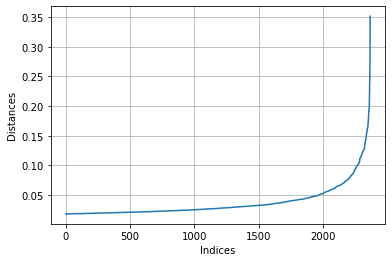

In [37]:
plt.plot(distances[27000:30000])
plt.ylabel('Distances')
plt.xlabel('Indices')
plt.ylabel('Distances')
plt.grid()

<b>Comments</b> on how we define the eps: 

these k-distances are plotted in ascending order. The aim is to determine the “knee”, which corresponds to the optimal eps parameter. A knee corresponds to a threshold where a sharp change occurs along the k-distance curve. From the plots above It can be seen that the optimal eps value is around a distance of 0.15.

In [38]:
from sklearn.cluster import DBSCAN
db_1=DBSCAN(eps=0.15, min_samples=100).fit(standard_df)

In [39]:
core_samples_mask = np.zeros_like(db_1.labels_, dtype=bool)
core_samples_mask[db_1.core_sample_indices_] = True
labels = db_1.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(db_1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

DBSCAN(eps=0.15, min_samples=100)
Estimated number of clusters: 4
Estimated number of noise points: 2640


<big><b>Question 3 b: Highlight the clusters found using DBSCAN and any outliers in a scatter plot. How many outliers are found? Plot a bar chart to show which amino acid residue types are most frequently outliers.</b></big>

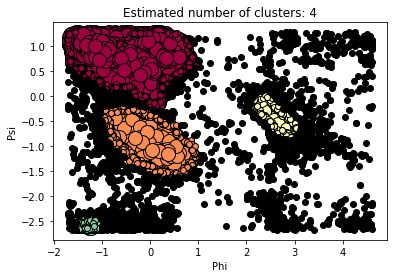

Estimated number of noise points: 2640


In [40]:
# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = standard_df[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = standard_df[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.xlabel('Phi')
plt.ylabel('Psi')
plt.show()
print('Estimated number of noise points: %d' % n_noise_)

<b>Comment:</b> as printed above the amount of outliers (noise points) is 2640

In [41]:
silhouette_score(standard_df, labels)

0.5396074280772434

Text(0.5, 1.0, 'Count of outliers for each amino acid residue type')

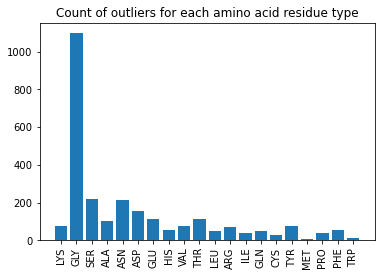

In [42]:
# Where labels are = -1 we have the outliers
labels_residue=labels.tolist()
residue_types=df['residue_name']

# Indices for the outliers
indices_outliers=[i for i, value in enumerate(labels_residue) if value==-1]

# Here we count the amount of times an amino acid residue is an outlier
counts_outliers=Counter(residue_types[indices_outliers])

# The bar chart
plt.bar(counts_outliers.keys(), counts_outliers.values())
plt.xticks(rotation='vertical')
plt.title('Count of outliers for each amino acid residue type')

<b>Comment:</b> 'GLY' is the amino acid residue type that by far is most frequently outliers.

<big><b>Question 3c: Compare the clusters found by DBSCAN with those found using K-means.</b></big>

DBSCAN finds more clusters with the parameters we chose as compared to K-means where the optimal amount of clusters were k=3. We also note that the DBSCAN algorithm finds outliers which the K-means algorithm does not. The silhouette score is lower for DBSCAN (~0.54) as compared to K-means (using non-transformed data). The reason for this could be that the silhouette score counts the outliers as its own cluster, so this would not be a good method of evaluating the clusters for DBSCAN. <br>

If we look at the scatterplot from question 1a it looks like there could be a cluster in the lower left corner and this DBSCAN captures which K-means did not. 

<big><b>Question 3 d: Discuss whether the clusters found using DBSCAN are robust to small changes in the minimum number of samples in the neighbourhood for a point to be considered a core point, and/or the choice of the maximum distance between two samples belonging to the same neighbourhood (epsilon)</b></big>

We start by discussing changes in the minimum number of samples in the neighbourhood for a point to be considered a core point, keeping the epsilon value constant. 

<b>Using min_samples=3, epsilon=0.15:</b>

In [43]:
db_2=DBSCAN(eps=0.15, min_samples=3).fit(standard_df)

In [44]:
labels = db_2.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(db_2)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

DBSCAN(eps=0.15, min_samples=3)
Estimated number of clusters: 23
Estimated number of noise points: 51


<b>Comment:</b> If we use min_samples=2 and epsilon 0.15 we get 23 clusters and 51 noise points.

<b>Using min_samples=4, epsilon=0.15:</b>

In [45]:
db_3=DBSCAN(eps=0.15, min_samples=4).fit(standard_df)

In [46]:
labels = db_3.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(db_3)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

DBSCAN(eps=0.15, min_samples=4)
Estimated number of clusters: 19
Estimated number of noise points: 73


<b>Comment: </b> When we use min_samples=3 and epsilon 0.15 we get 19 clusters and 73 noise points. 

Now we move on to investigating what happens if we make a small change in epsilon

<b>Using min_samples=3, epsilon=0.14:</b>

In [47]:
db_4=DBSCAN(eps=0.14, min_samples=3).fit(standard_df)

In [48]:
labels = db_4.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(db_4)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

DBSCAN(eps=0.14, min_samples=3)
Estimated number of clusters: 28
Estimated number of noise points: 62


<b>Comment:</b> So now we get 28 clusters as compared to 23 clusters when epsilon was 0.15.

<b>Discussion:</b> <br>
The DBSCAN algorithm is sensitive to changes in both min_samples and epsilon. However, using min_samples 3 or 4 (2 or 3 neighbours to the core point) is not suitable for this data set because some regions are so dense. 

<big><b>Question 4 a: Use DBSCAN to cluster the data that have residue type PRO. Investigate how the clusters found for amino acid residues of type PRO differ from the general clusters.</b></big>


In [49]:
# The data
df_PRO=df[df['residue_name']=='PRO']
df_PRO=df_PRO[['phi', 'psi']]

In [50]:
standard_df_PRO=StandardScaler().fit_transform(df_PRO)

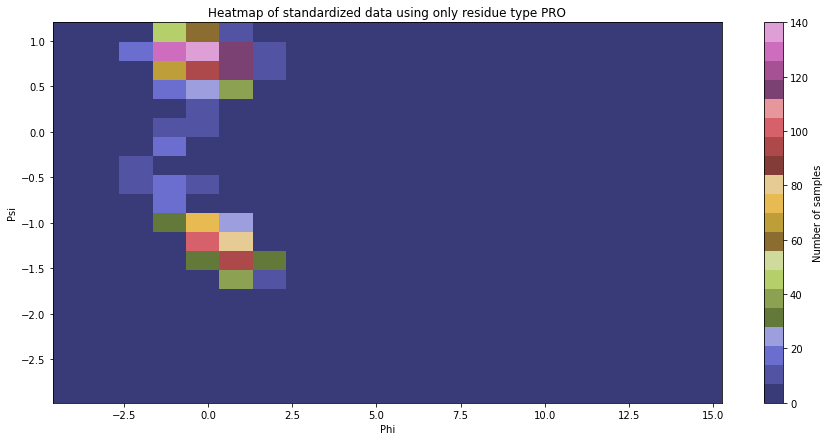

In [51]:
# Heatmap
plt.figure(figsize=(15, 7))
# Plot 2D histogram from X
# We can choose different colormaps (i.e., viridis, plasma, inferno, magma, cividis).
plt.hist2d(standard_df_PRO[:,0], standard_df_PRO[:,1], bins=20, cmap='tab20b')

# Plot a colorbar with label.
cb = plt.colorbar()
cb.set_label('Number of samples')

# Add title and labels to plot.

plt.title('Heatmap of standardized data using only residue type PRO')
plt.xlabel('Phi')
plt.ylabel('Psi')

# Show the plot.
plt.show()

<b>Comment:</b> Red and pink colors have the highest amount of samples. The blue/purple pixels contain around 0-20 samples each, the green/yellow pixels contain around 30-80 samples each and the red/purple pixels contain around 100-140 pixels each. There seems to be two clusters that contain pixels that are green and red/purple connected to each other. We choose min_samples=100.

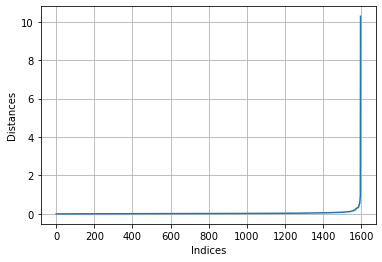

In [52]:
neighbours=NearestNeighbors(n_neighbors=2).fit(standard_df_PRO)
distances, indices = neighbours.kneighbors(standard_df_PRO)
distances=np.sort(distances, axis=0)
distances=distances[:,1]
plt.plot(distances)
plt.ylabel('Distances')
plt.xlabel('Indices')
plt.grid()

The below plot shows the turning position in detail.

Text(0, 0.5, 'Distances')

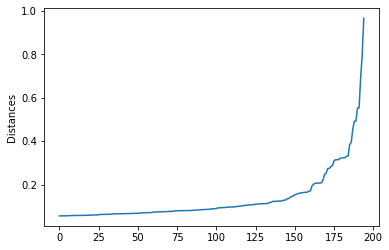

In [54]:

plt.plot(distances[1400:-1])
plt.ylabel('Distances')

Epsilon looks to be around 0.35.

In [56]:

db_PRO=DBSCAN(eps=0.35, min_samples=100).fit(standard_df_PRO)

In [57]:
core_samples_mask = np.zeros_like(db_PRO.labels_, dtype=bool)
core_samples_mask[db_PRO.core_sample_indices_] = True
labels = db_PRO.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(db_PRO)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

DBSCAN(eps=0.35, min_samples=100)
Estimated number of clusters: 2
Estimated number of noise points: 249


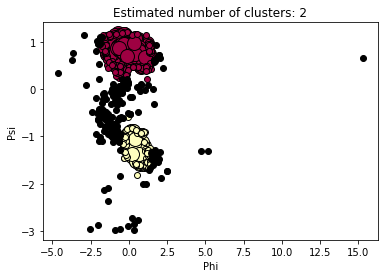

In [58]:
# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = standard_df_PRO[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = standard_df_PRO[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.xlabel('Phi')
plt.ylabel('Psi')
plt.show()

<big><b>Question 4 b: Use DBSCAN to cluster the data that have residue type GLY. Investigate how the clusters found for amino acid residues of type GLY differ from the general clusters.</b></big>


In [59]:
# The data
df_GLY=df[df['residue_name']=='GLY']
df_GLY=df_GLY[['phi', 'psi']]

In [60]:
standard_df_GLY=StandardScaler().fit_transform(df_GLY)

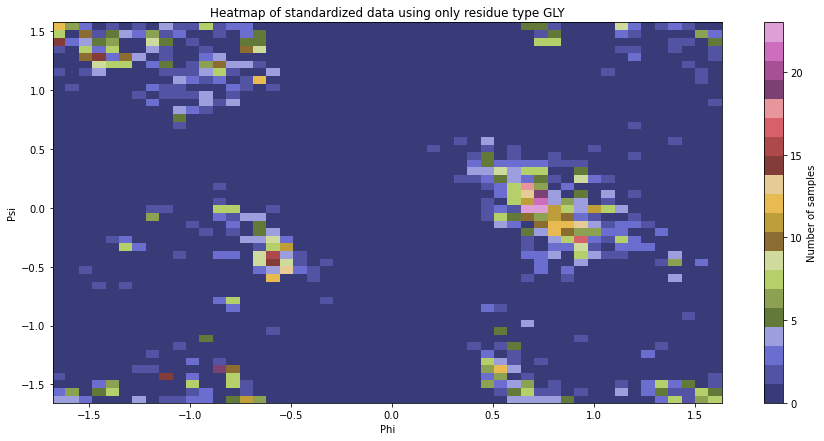

In [61]:
# Heatmap
plt.figure(figsize=(15, 7))
# Plot 2D histogram from X
# We can choose different colormaps (i.e., viridis, plasma, inferno, magma, cividis).
plt.hist2d(standard_df_GLY[:,0], standard_df_GLY[:,1], bins=50, cmap='tab20b')

# Plot a colorbar with label.
cb = plt.colorbar()
cb.set_label('Number of samples')

# Add title and labels to plot.

plt.title('Heatmap of standardized data using only residue type GLY')
plt.xlabel('Phi')
plt.ylabel('Psi')
# Show the plot.
plt.show()

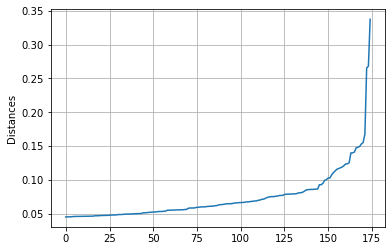

In [62]:
neighbours=NearestNeighbors(n_neighbors=2).fit(standard_df_GLY)
distances, indices = neighbours.kneighbors(standard_df_GLY)
distances=np.sort(distances, axis=0)
distances=distances[:,1]
plt.plot(distances[2000:-1])
plt.ylabel('Distances')
plt.grid()

In [63]:
db_GLY=DBSCAN(eps=0.15, min_samples=30).fit(standard_df_GLY)

In [64]:
core_samples_mask = np.zeros_like(db_GLY.labels_, dtype=bool)
core_samples_mask[db_GLY.core_sample_indices_] = True
labels = db_GLY.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(db_GLY)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

DBSCAN(eps=0.15, min_samples=30)
Estimated number of clusters: 8
Estimated number of noise points: 300


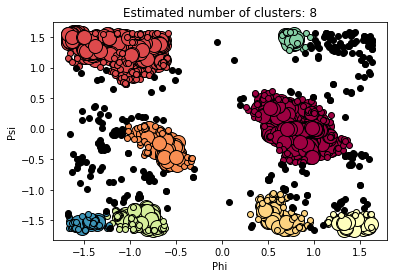

In [65]:
# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = standard_df_GLY[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = standard_df_GLY[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.xlabel('Phi')
plt.ylabel('Psi')
plt.show()

<b>Discussion for Question 4:</b> The results here show that there might be a better idea to stratify the data before trying to cluster. Both PRO and GLY have clusters in the upper left corners of the plot and if we use all amino acid residues at the same time the density here will be large. <br>

Another observation is that GLY was the amino acid residue that was most commonly an outlier when using DBSCAN for the full data set. When we stratified the data our result was that GLY contained more clusters than PRO.